In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt

#FOR PPG
import hrvanalysis
from hrvanalysis import get_frequency_domain_features,get_time_domain_features

#for EDA
import neurokit2 as nk



 ['T1', 'SA', 'EL', 'SR', 'PI', 'SF', 'GX', 'PG', 'GY', 'PR', 'GZ', 'EA', 'HR', 'MX', 'MY', 'AZ', 'AX', 'MZ', 'AY', 'TH']


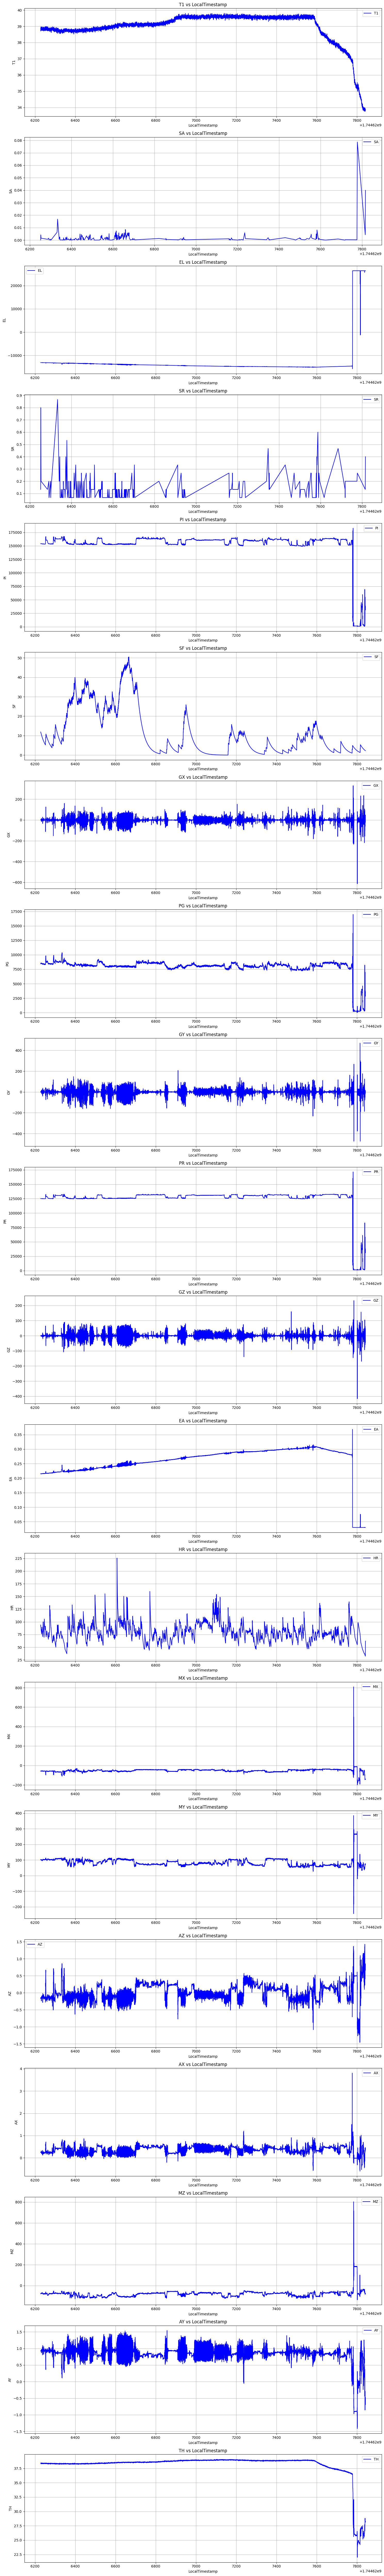

In [17]:
#Retrieving the metrics for a subject, plotting all of them to check raw data
#path = "/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/"
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT-SD-CARD/Record'
path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/TRIAL1/trial Olivier'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Bogdan'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-2-Nostreaming'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-1/'
metrics = ["EA","EL","SA", "SR", "SF", "PI", "PR", "PG", "HR", "TH", "AX", "AY", "AZ", "GX", "GY", "GZ",
           "MX", "MY", "MZ", "T1", "DC", "DO", "UN"]

files = [file for file in os.listdir(path) if file.endswith(tuple(f'_{s}.csv' for s in metrics))]


data_dict = {}


for file in files:
    metric = file.split('_')[-1].replace('.csv', '')  
    
    df = pd.read_csv(os.path.join(path, file))  
    
    if 'LocalTimestamp' in df.columns:
        df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
    else:
    
        continue  
    
    if metric not in df.columns:
        
        continue  

   
    data_dict[metric] = df


print(f" {list(data_dict.keys())}")


plt.figure(figsize=(15, 5 * len(data_dict)))  

for i, (metric, df) in enumerate(data_dict.items()):
    plt.subplot(len(data_dict), 1, i + 1)
    plt.plot(df['LocalTimestamp'], df[metric], label=metric, color='blue')
    plt.title(f'{metric} vs LocalTimestamp')
    plt.xlabel('LocalTimestamp')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Usar .loc[] para evitar el SettingWithCopyWarning
df.loc[:, 'LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')

# Ver los primeros valores para asegurarte que la conversión fue exitosa
print(df[['LocalTimestamp']].head())
df[['LocalTimestamp']]

df['TimeRelative'] = df['LocalTimestamp'] - df['LocalTimestamp'].iloc[0]

df['TimeRelative_seconds'] = df['TimeRelative'].dt.total_seconds()

df['TimeRelative_seconds']


                 LocalTimestamp
0 2025-04-14 10:23:48.061281919
1 2025-04-14 10:23:48.194278955
2 2025-04-14 10:23:48.327275991
3 2025-04-14 10:23:48.461272955
4 2025-04-14 10:23:48.594269991


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_12610/976604166.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2025-04-14 10:23:48.061281919', '2025-04-14 10:23:48.194278955',
 '2025-04-14 10:23:48.327275991', '2025-04-14 10:23:48.461272955',
 '2025-04-14 10:23:48.594269991', '2025-04-14 10:23:48.727267981',
 '2025-04-14 10:23:48.861264944', '2025-04-14 10:23:48.994261980',
 '2025-04-14 10:23:49.127259016', '2025-04-14 10:23:49.261255980',
 ...
 '2025-04-14 10:50:40.958072901', '2025-04-14 10:50:41.091069937',
 '2025-04-14 10:50:41.225066900', '2025-04-14 10:50:41.358063936',
 '2025-04-14 10:50:41.491061926', '2025-04-14 10:50:41.624058962',
 '2025-04-14 10:50:41.758055925', '2025-04-14 10:50:41.891052961',
 '2025-04-14 10:50:42.024049997', '2025-04-14 10:50:42.158046961']
Length: 12103, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compati

0           0.000000
1           0.132997
2           0.265994
3           0.399991
4           0.532988
            ...     
12098    1613.562777
12099    1613.696774
12100    1613.829771
12101    1613.962768
12102    1614.096765
Name: TimeRelative_seconds, Length: 12103, dtype: float64

In [19]:
#EA
df = data_dict.get("EA")  
df=df['EA']

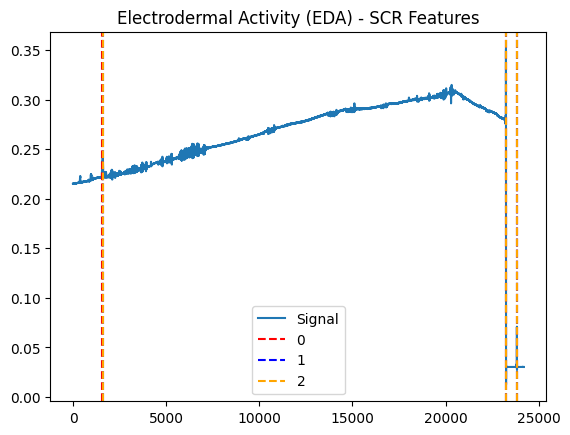

<Figure size 1200x600 with 0 Axes>

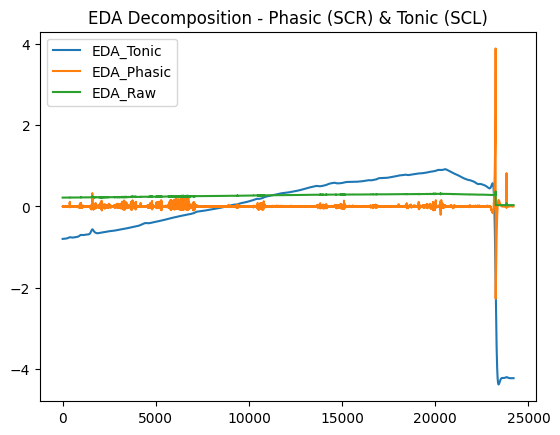

Feature Summary:
Mean EDA: 0.2585
Std EDA: 0.0540
Number of SCR Peaks: 3.0000
Mean SCR Peak Height: 0.0471


In [20]:
#EDA

signals, info = nk.eda_process(df, sampling_rate=15) 

scr_onsets = info["SCR_Onsets"]
scr_peaks = info["SCR_Peaks"]
scr_recovery = info["SCR_Recovery"]

# Plotting
nk.events_plot([scr_onsets, scr_peaks, scr_recovery], signals["EDA_Clean"], color=['red', 'blue', 'orange'])
plt.title("Electrodermal Activity (EDA) - SCR Features")
plt.show()

# SCl and SCR computing ( tonic and phasic)
data = nk.eda_phasic(nk.standardize(df), sampling_rate=15)
data["EDA_Raw"] = df  


plt.figure(figsize=(12, 6))
data.plot()
plt.title("EDA Decomposition - Phasic (SCR) & Tonic (SCL)")
plt.show()


features = {
    "Mean EDA": signals["EDA_Clean"].mean(),
    "Std EDA": signals["EDA_Clean"].std(),
    "Number of SCR Peaks": len(scr_peaks),
    "Mean SCR Peak Height": signals.loc[scr_peaks, "SCR_Amplitude"].mean() if len(scr_peaks) > 0 else 0,
}

print("Feature Summary:")
for key, value in features.items():
    print(f"{key}: {value:.4f}")
